# Исследование данных мобильного приложения "Ненужные вещи".

Мобильное приложение "Ненужные вещи" - приложение, в котором пользователи продают свои ненужные вещи, размещая их на доске объявлений.

Цель: Выделение групп пользователей на основе их поведения, анализ этих групп и формулировка рекомендаций заказчику, для корректировки работы приложения.

Заказчик: Продуктовый менеджер компании-разработчика
приложения. 

Описание данных:  Датасет содержит данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

## Загрузка данных и подготовка их к анализу.

###  *Загрузить данные.*

In [1]:
#импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math
import scipy.stats as stats

In [2]:
#чтение файлов с данными и сохранение в соответствующую переменную

dataset = pd.read_csv('/datasets/mobile_dataset.csv') 
sources = pd.read_csv('/datasets/mobile_soures.csv') 

In [3]:
dataset.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [4]:
sources.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


###  *Предобработка данных.*

#### Проверка типа данных

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [6]:
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


Необходимо перевести в тип дата данные столбца 'event.time' датасета dataset.

In [7]:
# преобразование данных о времени
time_format = "%Y-%m-%d %H:%M:%S"
dataset['event.time'] = pd.to_datetime(dataset['event.time'], format = time_format)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event.time  74197 non-null  datetime64[ns]
 1   event.name  74197 non-null  object        
 2   user.id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


#### Пропуски в датафреймах

In [9]:
#подсчет пропусков
dataset.isna().sum()

event.time    0
event.name    0
user.id       0
dtype: int64

In [10]:
#подсчет пропусков
sources.isna().sum()

userId    0
source    0
dtype: int64

Итак, пропусков в данных не обнаружено.

#### Дубликаты в датафреймах

Подсчитаем явные дубликаты.

In [11]:
#подсчет явных дубликатов
dataset.duplicated().sum()

0

In [12]:
sources.duplicated().sum()

0

Таким образом, дубликатов в данных не обнаружено.

#### *Дополнительные проверки данных.*

In [13]:
dataset.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [14]:
sources.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


#####  Категориальные переменные

Проверим категориальные переменные на корректность их написание.

In [15]:
dataset['event.name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event.name, dtype: int64

In [16]:
sources['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

Проверка категорийных данных показала отсутсвие описок или ошибок в них.

##### Пользовательские профили.

Создадим пользовательские профили (датасет ses_time), где добавим столбцы:
- начало сессии ('ses_time_min')
- конец сессии ('ses_time_max')

Сначала для удобства переименуем название данных 'show_contacts' на 'contacts_show', так как они отражают одно и то же событие. Приведем название с id пользователей к одному значению - user_id, в обеих таблицах. И объедим эти таблицы в один датасет dataset_sources.

In [17]:
#событие show_contacts переименуем в contacts_show
dataset[dataset['event.name'] == 'show_contacts'] = dataset[dataset['event.name'] == 'contacts_show']

In [18]:
#столбец id пользователя переименуем в user_id
dataset = dataset.rename(columns={'event.time': 'event.time', 'event.name': 'event.name', \
                        'user.id': 'user_id', 'Session Start': \
                        'Session Start', 'Session End': 'Session End'})

In [19]:
#столбец id пользователя переименуем в user_id
sources = sources.rename(columns={'userId': 'user_id', 'source': 'source'})

In [20]:
dataset_sources = dataset.merge(sources, on='user_id', how='left')
dataset_sources.head()

,event.time,event.name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


Создадим пользовательские профили, данные которых мы будем тспользовать в дальнейшем исследовании.

In [21]:
dataset_sources.head()

,event.time,event.name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


In [22]:
dataset_sources['event_day'] = dataset_sources['event.time'].dt.date
dataset_sources.head()

,event.time,event.name,user_id,source,event_day
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07


In [23]:
ses_time_min = dataset_sources.groupby(['user_id', 'event_day']).agg({'event.time':'min'}).\
reset_index().rename(columns={'event.time':'ses_time_min'})
ses_time_min.head()

,user_id,event_day,ses_time_min
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:39:45.989359
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:33:55.577963
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 19:52:30.778932
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:18:14.635436
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:34:33.849769


In [24]:
ses_time_max = dataset_sources.groupby(['user_id', 'event_day']).agg({'event.time':'max'}).\
reset_index().rename(columns={'event.time':'ses_time_max'})
ses_time_max.head()

,user_id,event_day,ses_time_max
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:49:41.716617
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:42:22.963948
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 20:07:30.051028
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:30:52.807203
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:59:54.637098


In [25]:
ses_time = ses_time_min.merge(ses_time_max , on=['user_id', 'event_day'] , how='left')
ses_time.head()

,user_id,event_day,ses_time_min,ses_time_max
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098


##### Численные данные.

Численными данными в данных датасетах будем считать информацию по датам - проверим их на наличие каких-то ошибок или аномалий

Логично, что время начала сессии ('ses_time_min') было раньше, чем время окончания сессии ('ses_time_max'), поэтому оно должно быть меньше. Проверим: 

In [26]:
ses_time[ses_time['ses_time_max']< ses_time['ses_time_min']].count()

user_id         0
event_day       0
ses_time_min    0
ses_time_max    0
dtype: int64

Итак, аномалий в числовых данных не обнаружено.

Вывод по п.1:

Итак, в данном пункте исследования были загружены основные данные и проведены следующие проверки:

1) Переведены в тип дата:

датасет dataset

- event.time

2) Проверка наличия пропусков и дубликатов в данных показала их отсутствие.

3) Проверка категорийных и численных данных показала отсутсвие описок или ошибок в них.

4) были созданы пользовательские профили




## Исследовательский анализ данных.

Итак, мы создали расширенные пользовательские профили, определили время первого и последнего события по каждому пользователю - все это нам необходимо в дальнейшем исследовании. 

### Источники, с которых пользователи установливают приложение.

Выясним источники, с которых пользователь устанавливает приложение(столбец source).

In [27]:
dataset_sources.head()

,event.time,event.name,user_id,source,event_day
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07


In [28]:
#сгруппируем по источникам
#найдем количество пользователей
#отсортируем по количеству 

display(dataset_sources.groupby('source').agg({'user_id':'nunique'})\
        .sort_values(by = 'user_id',ascending = False))

,user_id
source,
yandex,1934
other,1229
google,1129


<AxesSubplot:title={'center':'Источники привлечения пользователей'}, xlabel='source'>

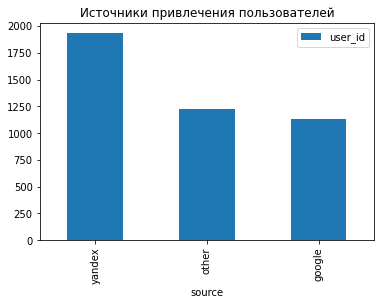

In [29]:
dataset_sources.groupby('source').agg({'user_id':'nunique'})\
        .sort_values(by = 'user_id',ascending = False)\
.plot(y='user_id', kind='bar', title=('Источники привлечения пользователей'))

Согласно полученным данным, yandex, как источник привлечения пользователей данного приложения, лидирует.

### Оценка пользовательской активности.

Чтобы посчитать дневную и недельную  активность пользователей (DAU, WAU), преобраузем данные о времени и выделим год, месяц и неделю начала сессии в отдельные столбцы. Построим графики.

In [30]:
ses_time.head()

,user_id,event_day,ses_time_min,ses_time_max
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098


In [31]:
# выделяем год, номер месяца и номер недели из времени начала сессии
ses_time['Session_Start_year'] = ses_time['ses_time_min'].dt.year
ses_time['Session_Start_month'] = ses_time['ses_time_min'].astype ('datetime64[M]')
ses_time['Session_Start_week'] = ses_time['ses_time_min'].astype ('datetime64[W]')
ses_time['Session_Start_date'] = ses_time['ses_time_min'].dt.date

display(ses_time.head())

,user_id,event_day,ses_time_min,ses_time_max,Session_Start_year,Session_Start_month,Session_Start_week,Session_Start_date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,2019,2019-10-01,2019-10-03,2019-10-07
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,2019,2019-10-01,2019-10-03,2019-10-09
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,2019,2019-10-01,2019-10-17,2019-10-21
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,2019,2019-10-01,2019-10-17,2019-10-22
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,2019,2019-10-01,2019-10-17,2019-10-19


In [32]:
#посчитаем DAU, WAU 

dau_total = (
    ses_time.groupby('Session_Start_date').agg({'user_id': 'nunique'}).mean()
)

wau_total = (ses_time
 .groupby(['Session_Start_week'])
 .agg({'user_id': 'nunique', 'Session_Start_date' : 'nunique'})
 .query('Session_Start_date == 7')
)['user_id'].mean()



display(int(dau_total))
display(int(wau_total)) 


279

1425

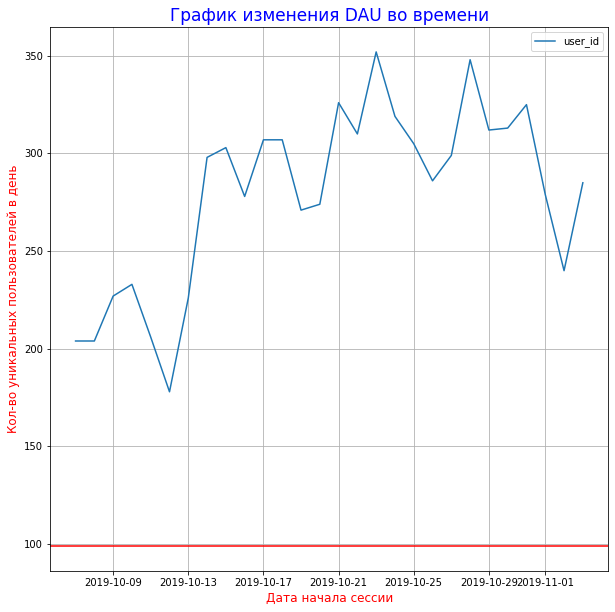

In [33]:
#построим график DAU
dau_total = (
    ses_time.groupby('Session_Start_date').agg({'user_id': 'nunique'})
)\
.plot(grid=True, figsize=(10, 10))
plt.xlabel('Дата начала сессии', fontsize = 12, color = 'red')
plt.ylabel('Кол-во уникальных пользователей в день', fontsize = 12, color = 'red')
plt.title('График изменения DAU во времени', fontsize = 17, color = 'blue')
plt.axhline(y=99, color='r', linestyle='-')
plt.show()

Судя по графику DAU: отмечаем цикличность показателя и тенденцию роста. К концу исследуемого периода DAU резко упало, но начинает расти.

In [34]:
ses_time \
 .groupby(['Session_Start_week']) \
 .agg({'user_id':'nunique', 'Session_Start_date':'nunique'}) \
 .query('Session_Start_date == 7')

,user_id,Session_Start_date
Session_Start_week,,
2019-10-10,1268,7
2019-10-17,1490,7
2019-10-24,1519,7


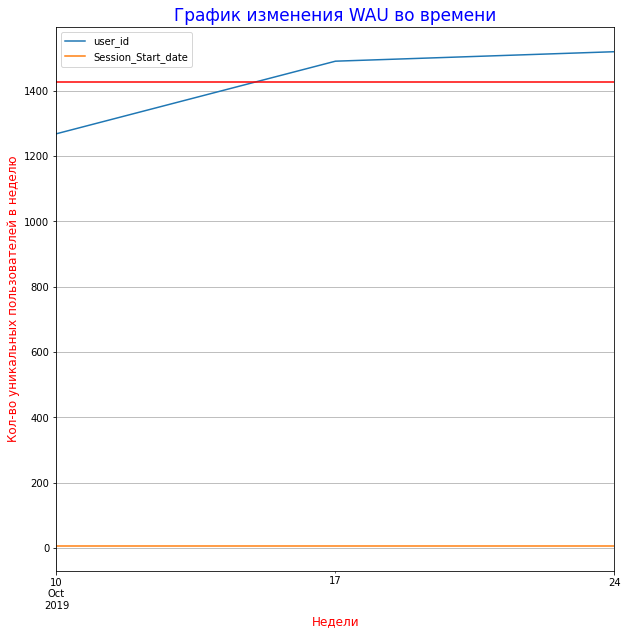

In [35]:
#построим график WAU
ses_time \
 .groupby(['Session_Start_week']) \
 .agg({'user_id':'nunique', 'Session_Start_date':'nunique'}) \
 .query('Session_Start_date == 7').plot(grid=True, figsize=(10, 10))
plt.xlabel('Недели', fontsize = 12, color = 'red')
plt.ylabel('Кол-во уникальных пользователей в неделю', fontsize = 12, color = 'red')
plt.title('График изменения WAU во времени', fontsize = 17, color = 'blue')
plt.axhline(y=int(wau_total), color='r', linestyle='-')
plt.show()

По графику WAU видно, что этот показатель плавно растет.

Итак по графикам пользовательской активности видна тенденция роста, однако в конце октября 2019 года количество уникальных пользователей резко начало снижаться, но учитывая анализ динамики по дням - заметна цикличность данного показателя, и в начале ноября рост.

### Пользовательские сессии.

Средняя продолжительность сессии, или ASL, показывает, сколько в среднем длится сессия пользователя.

Найдём ASL — посчитаем длительность всех сессий и вычислим среднее.

In [36]:
ses_time.head()

,user_id,event_day,ses_time_min,ses_time_max,Session_Start_year,Session_Start_month,Session_Start_week,Session_Start_date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,2019,2019-10-01,2019-10-03,2019-10-07
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,2019,2019-10-01,2019-10-03,2019-10-09
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,2019,2019-10-01,2019-10-17,2019-10-21
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,2019,2019-10-01,2019-10-17,2019-10-22
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,2019,2019-10-01,2019-10-17,2019-10-19


In [37]:
# считаем ASL в секундах

ses_time['session_duration_sec'] = (
    ses_time['ses_time_max'] - ses_time['ses_time_min']
).dt.total_seconds()

display(int((ses_time['session_duration_sec'].mean()))) 

4977

In [38]:
#переведем секунды в минуты и округлим до целого
round((int((ses_time['session_duration_sec'].mean()))/60),0)

83.0

Итог, что пользователям в среднем от начала до конца сессии необходимо 83 минуты (примерно 1,5 часа).

Теперь взглянем на распределение.

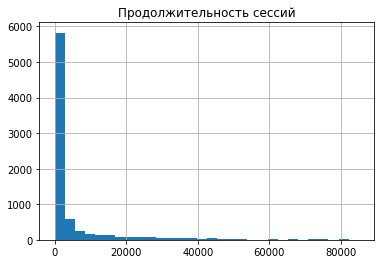

In [39]:
# строим гистограмму

ses_time['session_duration_sec'].hist(bins=30)
plt.title('Продолжительность сессий')
plt.show() 

Секунды, проведённые пользователями в приложении, имеют экспоненциальное распределение с пиком в районе нуля. И это нормально — в любом цифровом сервисе очень многие сессии заканчиваются техническими ошибками.
Все «ошибочные» сессии на графике попадают в корзину, которая ближе всего к нулю, а успешные — «размазываются» в длинный хвост. 

### Продолжительность одной сессии.

Чтобы оценить «здоровье» сессий, ожидаемую длительность минимального пользовательского пути сравнивают с медианной продолжительностью сессии. 

In [40]:
display(ses_time['session_duration_sec'].median()/60) 

11.809974733333336

Медианная продолжительность сессии - 11 минут, это больше радует, как средняя продолжительность (1,5 часа), но этот показатель лучше отражает реальность.

### Число пользовательских сессий.

Рассчитаем среднее число пользовательских сессий в день. Построим график. 

In [41]:
ses_time.head()

,user_id,event_day,ses_time_min,ses_time_max,Session_Start_year,Session_Start_month,Session_Start_week,Session_Start_date,session_duration_sec
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,2019,2019-10-01,2019-10-03,2019-10-07,595.727258
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,2019,2019-10-01,2019-10-03,2019-10-09,507.385985
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,2019,2019-10-01,2019-10-17,2019-10-21,899.272096
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,2019,2019-10-01,2019-10-17,2019-10-22,758.171767
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,2019,2019-10-01,2019-10-17,2019-10-19,1520.787329


In [42]:
session_count_mean = ses_time.groupby('Session_Start_date')\
.agg({'session_duration_sec': 'count'}).mean()
display(int(session_count_mean))

279

Построим график, отражающий распределение общего числа сессий в день.

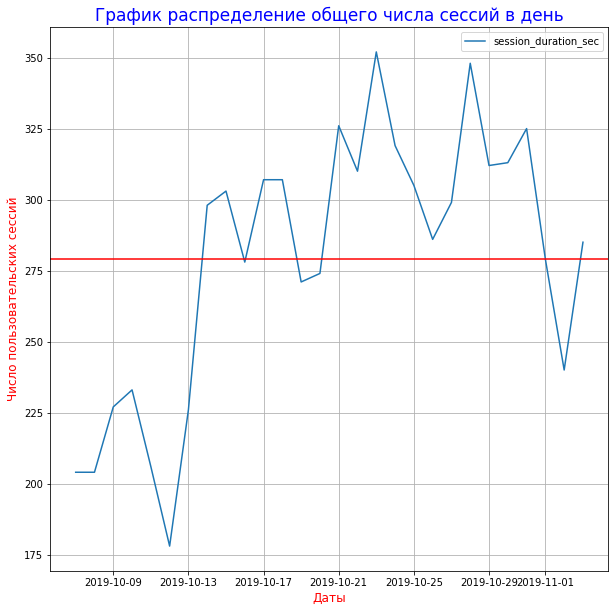

In [43]:
ses_time.groupby('Session_Start_date').agg({'session_duration_sec': 'count'})\
.plot(grid=True, figsize=(10, 10))
plt.xlabel('Даты', fontsize = 12, color = 'red')
plt.ylabel('Число пользовательских сессий', fontsize = 12, color = 'red')
plt.title('График распределение общего числа сессий в день', fontsize = 17, color = 'blue')
plt.axhline(y=int(session_count_mean), color='r', linestyle='-')
plt.show()

По графику видна цикличность и тенденция к росту показателя  - число сессий в день. Хотя в в конце октября  заметен резкий спад и уже в начале ноября показатель уже пошел вверх.

Вывод по п. 2:
- как источник привлечения пользователей данного приложения, yandex - лидирует;
- в конце октября 2019 года количество уникальных пользователей резко начало снижаться, но учитывая анализ динамики по дням - заметна цикличность данного показателя, и в начале ноября рост;
- по имеющимся данным, пользователям в среднем от начала до конца сессии необходимо примерно 1,5 часа. Однако, учитывая наличие выбросов, и рассчитав медианную продолжительность сессии - 11 минут, приходим к выводу, что этот показатель лучше отражает реальность.
- рассчитано среднее число сессий в день - 279, динамика данного показателя показывает цикличность и тенденция к росту показателя  - число сессий в день. Хотя в в конце октября  заметен резкий спад и уже в начале ноября показатель уже пошел вверх.

## Выделение групп пользователей на основе действий

Разделим всех пользователей на группы, исходя из источника, с которого пользователь установил приложение:
- Yandex
- Google
- Other.

Рассчитав и проанализировав ряд метрик в разрезе этих групп, можно будет сделать вывод: какому именно источнику привлечения пользователей уделить большее внимание.

Создадим отдельные датафреймы исходных данных для этих групп и сохраним их в соответствующие переменные.

In [44]:
ses_time.head()

,user_id,event_day,ses_time_min,ses_time_max,Session_Start_year,Session_Start_month,Session_Start_week,Session_Start_date,session_duration_sec
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,2019,2019-10-01,2019-10-03,2019-10-07,595.727258
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,2019,2019-10-01,2019-10-03,2019-10-09,507.385985
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,2019,2019-10-01,2019-10-17,2019-10-21,899.272096
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,2019,2019-10-01,2019-10-17,2019-10-22,758.171767
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,2019,2019-10-01,2019-10-17,2019-10-19,1520.787329


In [45]:
ses_time_sources = ses_time.merge(sources, on='user_id', how = 'left')
ses_time_sources.head()

,user_id,event_day,ses_time_min,ses_time_max,Session_Start_year,Session_Start_month,Session_Start_week,Session_Start_date,session_duration_sec,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,2019,2019-10-01,2019-10-03,2019-10-07,595.727258,other
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,2019,2019-10-01,2019-10-03,2019-10-09,507.385985,other
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,2019,2019-10-01,2019-10-17,2019-10-21,899.272096,other
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,2019,2019-10-01,2019-10-17,2019-10-22,758.171767,other
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,2019,2019-10-01,2019-10-17,2019-10-19,1520.787329,yandex


In [46]:
profiles_sources_yandex = ses_time_sources.query('source == "yandex"')
profiles_sources_yandex.head()

,user_id,event_day,ses_time_min,ses_time_max,Session_Start_year,Session_Start_month,Session_Start_week,Session_Start_date,session_duration_sec,source
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,2019,2019-10-01,2019-10-17,2019-10-19,1520.787329,yandex
5,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20,2019-10-20 18:49:24.115634,2019-10-20 20:05:36.234073,2019,2019-10-01,2019-10-17,2019-10-20,4572.118439,yandex
6,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-24,2019-10-24 10:50:40.219833,2019-10-24 10:57:12.675110,2019,2019-10-01,2019-10-24,2019-10-24,392.455277,yandex
7,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-29,2019-10-29 21:18:24.850073,2019-10-29 22:10:25.712840,2019,2019-10-01,2019-10-24,2019-10-29,3120.862767,yandex
8,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-30,2019-10-30 07:50:45.948358,2019-10-30 08:26:53.933176,2019,2019-10-01,2019-10-24,2019-10-30,2167.984818,yandex


In [47]:
profiles_sources_google = ses_time_sources.query('source == "google"')
profiles_sources_google.head()

,user_id,event_day,ses_time_min,ses_time_max,Session_Start_year,Session_Start_month,Session_Start_week,Session_Start_date,session_duration_sec,source
11,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18,2019-10-18 22:14:05.555052,2019-10-18 22:17:40.719687,2019,2019-10-01,2019-10-17,2019-10-18,215.164635,google
12,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-20,2019-10-20 17:47:18.569612,2019-10-20 17:48:42.169252,2019,2019-10-01,2019-10-17,2019-10-20,83.599640,google
13,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-25,2019-10-25 22:17:31.839852,2019-10-25 22:45:50.328522,2019,2019-10-01,2019-10-24,2019-10-25,1698.488670,google
14,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-26,2019-10-26 23:34:21.527526,2019-10-26 23:44:21.330476,2019,2019-10-01,2019-10-24,2019-10-26,599.802950,google
15,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-27,2019-10-27 00:07:32.519908,2019-10-27 20:18:26.910719,2019,2019-10-01,2019-10-24,2019-10-27,72654.390811,google


In [48]:
profiles_sources_other = ses_time_sources.query('source == "other"')
profiles_sources_other.head()

,user_id,event_day,ses_time_min,ses_time_max,Session_Start_year,Session_Start_month,Session_Start_week,Session_Start_date,session_duration_sec,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,2019,2019-10-01,2019-10-03,2019-10-07,595.727258,other
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,2019,2019-10-01,2019-10-03,2019-10-09,507.385985,other
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,2019,2019-10-01,2019-10-17,2019-10-21,899.272096,other
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,2019,2019-10-01,2019-10-17,2019-10-22,758.171767,other
40,013bbb57-ca6f-4af3-b586-4a046d3d3dee,2019-10-11,2019-10-11 12:20:48.990262,2019-10-11 17:20:17.974710,2019,2019-10-01,2019-10-10,2019-10-11,17968.984448,other


In [49]:
dataset_sources_yandex = dataset_sources.query('source == "yandex"')
dataset_sources_yandex.head()

,event.time,event.name,user_id,source,event_day
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
11,2019-10-07 00:02:06.225301,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07


In [50]:
dataset_sources_google = dataset_sources.query('source == "google"')
dataset_sources_google.head()

,event.time,event.name,user_id,source,event_day
37,2019-10-07 00:09:33.715659,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07
44,2019-10-07 00:11:48.977227,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07
49,2019-10-07 00:13:34.329171,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07
50,2019-10-07 00:13:45.388325,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07
57,2019-10-07 00:15:03.196647,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439,google,2019-10-07


In [51]:
dataset_sources_other = dataset_sources.query('source == "other"')
dataset_sources_other.head()

,event.time,event.name,user_id,source,event_day
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
6,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07


## Расчет и анализ метрик 

В разбивке по каждой группе пользователей рассчитать и проанализировать следующие метрики:

- retention rate,
- время, проведённое в приложении,
- частота действий,
- конверсия в целевое события - просмотр контактов.

### Расчет retention rate.

- Для каждой группы пользователей рассчитать Retention Rate, или коэффициент удержания, который показывает, как долго клиенты остаются с компанией.
- Построить тепловые карты к ним.

#### Yandex - как источник привлечения пользователей.

In [52]:
dataset_sources_yandex.head()

,event.time,event.name,user_id,source,event_day
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
11,2019-10-07 00:02:06.225301,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07


In [53]:
# перевод формат дат
dataset_sources_yandex['active_date'] = \
dataset_sources_yandex['event.time'].astype('datetime64[W]')

# cгруппируем и найдем первый заход для каждого id
first_ts = dataset_sources_yandex.groupby('user_id').\
agg({'event.time': 'min'}).reset_index()
first_ts = first_ts.rename(columns={'event.time':'first_ts'})
first_ts['first_ts'] = first_ts['first_ts'].astype('datetime64[W]')

# объеденим датасеты
dataset_sources_yandex = first_ts.merge(dataset_sources_yandex, on = 'user_id')

# выводим результат
dataset_sources_yandex.head()


/tmp/ipykernel_363/1435178945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_sources_yandex['active_date'] = \


,user_id,first_ts,event.time,event.name,source,event_day,active_date
0,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:34:33.849769,search_1,yandex,2019-10-19,2019-10-17
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:35:19.296599,search_1,yandex,2019-10-19,2019-10-17
2,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:36:44.344691,search_1,yandex,2019-10-19,2019-10-17
3,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:40:38.990477,photos_show,yandex,2019-10-19,2019-10-17
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:42:13.837523,photos_show,yandex,2019-10-19,2019-10-17


In [54]:
# расчет lifetime
dataset_sources_yandex['lifetime'] =\
dataset_sources_yandex['active_date'] - dataset_sources_yandex['first_ts']

# выводим результат
dataset_sources_yandex.head()

,user_id,first_ts,event.time,event.name,source,event_day,active_date,lifetime
0,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:34:33.849769,search_1,yandex,2019-10-19,2019-10-17,0 days
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:35:19.296599,search_1,yandex,2019-10-19,2019-10-17,0 days
2,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:36:44.344691,search_1,yandex,2019-10-19,2019-10-17,0 days
3,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:40:38.990477,photos_show,yandex,2019-10-19,2019-10-17,0 days
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:42:13.837523,photos_show,yandex,2019-10-19,2019-10-17,0 days


In [55]:
# строим таблицу удержания
result_grouped = dataset_sources_yandex.pivot_table(
    index=['first_ts'], columns='lifetime', values='user_id', aggfunc='nunique'
)

# выводим результат
result_grouped

lifetime,0 days,7 days,14 days,21 days,28 days
first_ts,,,,,
2019-10-03,247.0,68.0,41.0,23.0,14.0
2019-10-10,518.0,123.0,78.0,35.0,NaN
2019-10-17,499.0,118.0,39.0,NaN,NaN
2019-10-24,462.0,73.0,NaN,NaN,NaN
2019-10-31,208.0,NaN,NaN,NaN,NaN


In [56]:
# вычисляем размеры когорт
cohort_sizes = (
    dataset_sources_yandex.groupby('first_ts')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)
cohort_sizes

,cohort_size
first_ts,
2019-10-03,247
2019-10-10,518
2019-10-17,499
2019-10-24,462
2019-10-31,208


In [57]:
# объединяем размеры когорт и таблицу удержания
result_grouped = cohort_sizes.merge(
    result_grouped, on='first_ts', how='left'
)

# выводим результат (получится retention по количеству пользователей)
result_grouped

# делим данные таблицы удержания на размеры когорт (чтобы получить проценты)

result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

# выводим результат
result_grouped


,0 days 00:00:00,7 days 00:00:00,14 days 00:00:00,21 days 00:00:00,28 days 00:00:00
first_ts,,,,,
2019-10-03,1.0,0.275304,0.165992,0.093117,0.05668
2019-10-10,1.0,0.237452,0.150579,0.067568,NaN
2019-10-17,1.0,0.236473,0.078156,NaN,NaN
2019-10-24,1.0,0.158009,NaN,NaN,NaN
2019-10-31,1.0,NaN,NaN,NaN,NaN


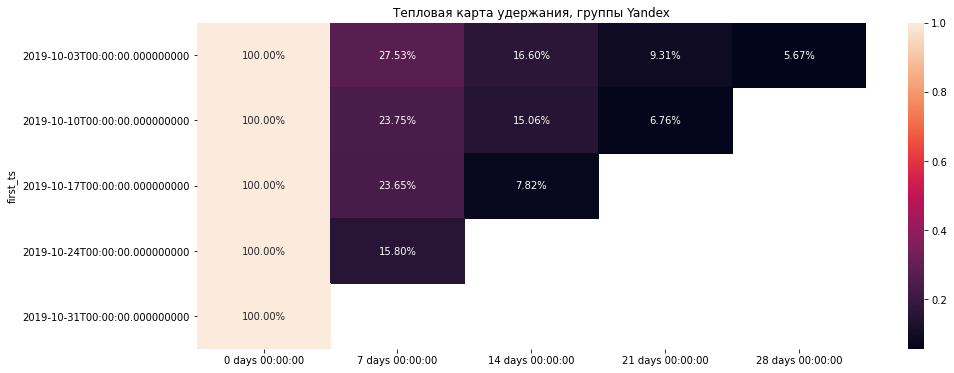

In [58]:
#строим хитмэп

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    result_grouped,  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания, группы Yandex')  # название графика
plt.show()

Итак, по чуть более светлым пятнам на графике видно, что лучшее удержание  - показали пользователи на второй недели , привлечённые 2019-10-03 - 27,53%.


In [59]:
#среднее значение на 7 и 14 день

rr_y_7 = round((27.53 + 23.75 + 23.65 + 15.8)/4, 2)
display(rr_y_7)
rr_y_14 = round((16.6 + 15.06 + 7.82)/4,2)
rr_y_14


22.68

9.87

#### Google - как источник привлечения пользователей.

In [60]:
# перевод формат дат
dataset_sources_google['active_date'] = \
dataset_sources_google['event.time'].astype('datetime64[W]')

# cгруппируем и найдем первый заход для каждого id
first_ts_g = dataset_sources_google.groupby('user_id').\
agg({'event.time': 'min'}).reset_index()
first_ts_g = first_ts_g.rename(columns={'event.time':'first_ts'})
first_ts_g['first_ts'] = first_ts_g['first_ts'].astype('datetime64[W]')

# объеденим датасеты
dataset_sources_google = first_ts_g.merge(dataset_sources_google, on = 'user_id')

# выводим результат
dataset_sources_google.head()


/tmp/ipykernel_363/3156985824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_sources_google['active_date'] = \


,user_id,first_ts,event.time,event.name,source,event_day,active_date
0,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-17,2019-10-18 22:14:05.555052,search_7,google,2019-10-18,2019-10-17
1,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-17,2019-10-18 22:14:16.960831,search_5,google,2019-10-18,2019-10-17
2,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-17,2019-10-18 22:17:40.719687,map,google,2019-10-18,2019-10-17
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-17,2019-10-20 17:47:18.569612,search_7,google,2019-10-20,2019-10-17
4,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-17,2019-10-20 17:47:19.889629,search_4,google,2019-10-20,2019-10-17


In [61]:
# расчет lifetime
dataset_sources_google['lifetime'] =\
dataset_sources_google['active_date'] - dataset_sources_google['first_ts']

# выводим результат
dataset_sources_google.head()

,user_id,first_ts,event.time,event.name,source,event_day,active_date,lifetime
0,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-17,2019-10-18 22:14:05.555052,search_7,google,2019-10-18,2019-10-17,0 days
1,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-17,2019-10-18 22:14:16.960831,search_5,google,2019-10-18,2019-10-17,0 days
2,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-17,2019-10-18 22:17:40.719687,map,google,2019-10-18,2019-10-17,0 days
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-17,2019-10-20 17:47:18.569612,search_7,google,2019-10-20,2019-10-17,0 days
4,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-17,2019-10-20 17:47:19.889629,search_4,google,2019-10-20,2019-10-17,0 days


In [62]:
# строим таблицу удержания
result_grouped_g = dataset_sources_google.pivot_table(
    index=['first_ts'], columns='lifetime', values='user_id', aggfunc='nunique'
)

# выводим результат
result_grouped_g

lifetime,0 days,7 days,14 days,21 days,28 days
first_ts,,,,,
2019-10-03,142.0,36.0,17.0,16.0,12.0
2019-10-10,288.0,70.0,42.0,20.0,NaN
2019-10-17,327.0,74.0,26.0,NaN,NaN
2019-10-24,246.0,43.0,NaN,NaN,NaN
2019-10-31,126.0,NaN,NaN,NaN,NaN


In [63]:
# вычисляем размеры когорт
cohort_sizes_g = (
    dataset_sources_google.groupby('first_ts')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)
cohort_sizes_g

,cohort_size
first_ts,
2019-10-03,142
2019-10-10,288
2019-10-17,327
2019-10-24,246
2019-10-31,126


In [64]:
# объединяем размеры когорт и таблицу удержания
result_grouped_g = cohort_sizes_g.merge(
    result_grouped_g, on='first_ts', how='left'
)

# выводим результат (получится retention по количеству пользователей)
result_grouped_g

# делим данные таблицы удержания на размеры когорт (чтобы получить проценты)

result_grouped_g = result_grouped_g.div(
    result_grouped_g['cohort_size'], axis=0
).drop(columns=['cohort_size'])

# выводим результат
result_grouped_g


,0 days 00:00:00,7 days 00:00:00,14 days 00:00:00,21 days 00:00:00,28 days 00:00:00
first_ts,,,,,
2019-10-03,1.0,0.253521,0.119718,0.112676,0.084507
2019-10-10,1.0,0.243056,0.145833,0.069444,NaN
2019-10-17,1.0,0.226300,0.079511,NaN,NaN
2019-10-24,1.0,0.174797,NaN,NaN,NaN
2019-10-31,1.0,NaN,NaN,NaN,NaN


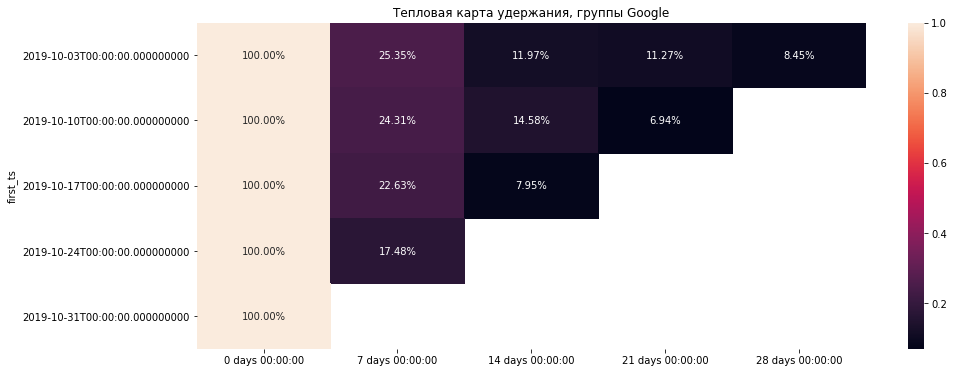

In [65]:
#строим хитмэп

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    result_grouped_g,  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания, группы Google')  # название графика
plt.show()

Лучшее удержание  - показали пользователи на второй недели , привлечённые 2019-10-03 - 25,35%.

In [66]:
#среднее значение на 7 и 14 день

rr_g_7 = round((25.35 + 24.31 + 22.63 + 17.4)/4, 2)
display(rr_g_7)
rr_g_14 = round((11.97 + 14.5 + 7.95)/4,2)
rr_g_14


22.42

8.61

#### 'Other' источники привлечения пользователей.

In [67]:
# перевод формат дат
dataset_sources_other['active_date'] = dataset_sources_other['event.time'].astype('datetime64[W]')

# cгруппируем и найдем первый заход для каждого id
first_ts_ot = dataset_sources_other.groupby('user_id').agg({'event.time': 'min'}).reset_index()
first_ts_ot = first_ts_ot.rename(columns={'event.time':'first_ts'})
first_ts_ot['first_ts'] = first_ts_ot['first_ts'].astype('datetime64[W]')

# объеденим датасеты
dataset_sources_other = first_ts_ot.merge(dataset_sources_other, on = 'user_id')

# выводим результат
dataset_sources_other.head()

# расчет lifetime
dataset_sources_other['lifetime'] = \
dataset_sources_other['active_date'] - dataset_sources_other['first_ts']

# выводим результат
dataset_sources_other.head()

# строим таблицу удержания
result_grouped_ot = dataset_sources_other.pivot_table(
    index=['first_ts'], columns='lifetime', values='user_id', aggfunc='nunique'
)

# выводим результат
result_grouped_ot

# вычисляем размеры когорт
cohort_sizes_ot = (
    dataset_sources_other.groupby('first_ts')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

# объединяем размеры когорт и таблицу удержания
result_grouped_ot = cohort_sizes_ot.merge(
    result_grouped_ot, on='first_ts', how='left'
)

# выводим результат (здесь у тебя получится retention по количеству пользователей)
result_grouped_ot

# делим данные таблицы удержания на размеры когорт (чтобы получить проценты)

result_grouped_ot = result_grouped_ot.div(
    result_grouped_ot['cohort_size'], axis=0
).drop(columns=['cohort_size'])

# выводим результат
result_grouped_ot


/tmp/ipykernel_363/3137595152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_sources_other['active_date'] = dataset_sources_other['event.time'].astype('datetime64[W]')


,0 days 00:00:00,7 days 00:00:00,14 days 00:00:00,21 days 00:00:00,28 days 00:00:00
first_ts,,,,,
2019-10-03,1.0,0.278481,0.215190,0.132911,0.082278
2019-10-10,1.0,0.219745,0.168790,0.076433,NaN
2019-10-17,1.0,0.261290,0.116129,NaN,NaN
2019-10-24,1.0,0.196721,NaN,NaN,NaN
2019-10-31,1.0,NaN,NaN,NaN,NaN


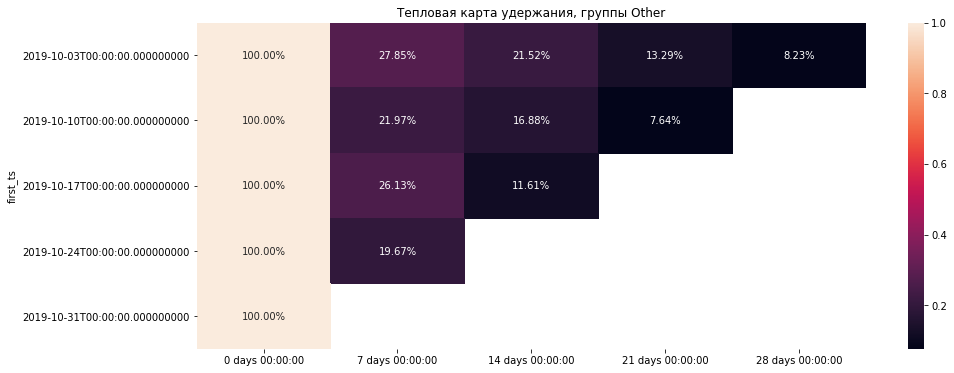

In [68]:
#строим хитмэп

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    result_grouped_ot,  # удаляем размеры когорт
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания, группы Other')  # название графика
plt.show()

Для сравнительного анализа показателя Retention rate по группам, найдем их средние значения на 7 и 14 день.
Yandex:
7 день

In [69]:
#среднее значение на 7 и 14 день

rr_ot_7 = round((27.85 + 21.97 + 26.13 + 19.67)/4, 2)
display(rr_ot_7)
rr_ot_14 = round((21.52 + 16.88 + 11.61)/4, 2)
rr_ot_14


23.91

12.5

In [70]:
display(rr_y_7) 
display(rr_y_14) 
display(rr_g_7) 
display(rr_g_14) 
display(rr_ot_7) 
display(rr_ot_14) 

22.68

9.87

22.42

8.61

23.91

12.5

Итак, сравнивая среднее значение retention rate на 7 или 14 день в группах, приходим к выводу, что
самый высокий коэффициент удержания имеют пользователи группы 'Other', на втором месте - пользователи Yandex и третье - пользователи Google.

### Время, проведённое в приложении

Посчитать среднее время в часах, проведенное в приложении, в разбивке по группам. Сравнить и сделать вывод,

Выше в п.2 мы уже анализировали показатель продолжительности пользовательской сессии в общем по всем данным, сейчас рассмотрим в разбивке по группам.

#### Yandex - как источник привлечения пользователей.

In [71]:
profiles_sources_yandex.head()

,user_id,event_day,ses_time_min,ses_time_max,Session_Start_year,Session_Start_month,Session_Start_week,Session_Start_date,session_duration_sec,source
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,2019,2019-10-01,2019-10-17,2019-10-19,1520.787329,yandex
5,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20,2019-10-20 18:49:24.115634,2019-10-20 20:05:36.234073,2019,2019-10-01,2019-10-17,2019-10-20,4572.118439,yandex
6,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-24,2019-10-24 10:50:40.219833,2019-10-24 10:57:12.675110,2019,2019-10-01,2019-10-24,2019-10-24,392.455277,yandex
7,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-29,2019-10-29 21:18:24.850073,2019-10-29 22:10:25.712840,2019,2019-10-01,2019-10-24,2019-10-29,3120.862767,yandex
8,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-30,2019-10-30 07:50:45.948358,2019-10-30 08:26:53.933176,2019,2019-10-01,2019-10-24,2019-10-30,2167.984818,yandex


In [72]:
# считаем ASL в секундах

profiles_sources_yandex['session_duration_sec'] = (
    profiles_sources_yandex['ses_time_max'] - profiles_sources_yandex['ses_time_min']
).dt.total_seconds()

display(int((profiles_sources_yandex['session_duration_sec'].mean()))) 

/tmp/ipykernel_363/2237426479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profiles_sources_yandex['session_duration_sec'] = (


4850

In [73]:
#переведем секунды в минуты и округлим до целого
round((int((profiles_sources_yandex['session_duration_sec'].mean()))/60),0)

81.0

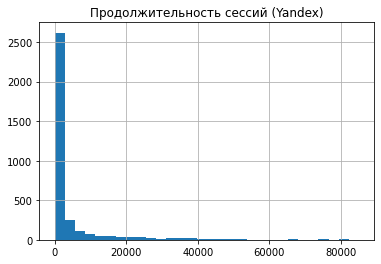

In [74]:
# строим гистограмму

profiles_sources_yandex['session_duration_sec'].hist(bins=30)
plt.title('Продолжительность сессий (Yandex)')
plt.show()

In [75]:
ses_yandex = display(profiles_sources_yandex['session_duration_sec'].median()//60)
ses_yandex

12.0

Результаты по показателю средней продолжительности пользовательских сессий группы Yandex - 81 минута (примерно 1,5 часа), но медианное (более реальное, учитывая наличие выбросов (см. на графике)) - 12 мин.

#### Google - как источник привлечения пользователей.

In [76]:
# считаем ASL в секундах

profiles_sources_google['session_duration_sec'] = (
    profiles_sources_google['ses_time_max'] - profiles_sources_google['ses_time_min']
).dt.total_seconds()

display(int((profiles_sources_google['session_duration_sec'].mean()))) 

/tmp/ipykernel_363/1070706354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profiles_sources_google['session_duration_sec'] = (


5587

In [77]:
#переведем секунды в минуты и округлим до целого
round((int((profiles_sources_google['session_duration_sec'].mean()))/60),0)

93.0

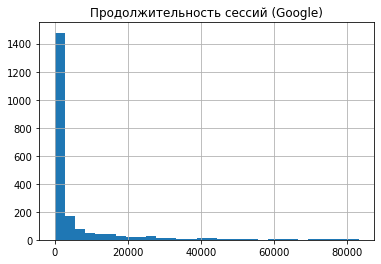

In [78]:
# строим гистограмму

profiles_sources_google['session_duration_sec'].hist(bins=30)
plt.title('Продолжительность сессий (Google)')
plt.show()

In [79]:
ses_google = display(profiles_sources_google['session_duration_sec'].median()//60) 
ses_google 

13.0

Результат группы пользователей Google: средняя продолжительность сессии - 93 минуты (1,5 часа), медианное - 13 минут. 

#### 'Other' источники привлечения пользователей.

In [80]:
# считаем ASL в секундах

profiles_sources_other['session_duration_sec'] = (
    profiles_sources_other['ses_time_max'] - profiles_sources_other['ses_time_min']
).dt.total_seconds()

display(int((profiles_sources_other['session_duration_sec'].mean()))) 

/tmp/ipykernel_363/1288489187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profiles_sources_other['session_duration_sec'] = (


4619

In [81]:
#переведем секунды в минуты и округлим до целого
round((int((profiles_sources_other['session_duration_sec'].mean()))/60),0)

77.0

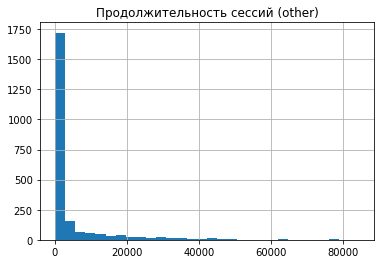

In [82]:
# строим гистограмму

profiles_sources_other['session_duration_sec'].hist(bins=30)
plt.title('Продолжительность сессий (other)')
plt.show()

In [83]:
ses_other = display(profiles_sources_other['session_duration_sec'].median()//60) 
ses_other

9.0

Расчет средней продолжительности пользовательских сессий группы 'Other' показал - 77 минут. Но медианное время одной сесси в этой группе  - 9 минут. Это самые низкие показатели по сравнению с другими группами.

Для наглядности покажем продолжительность сессий разных групп на одной диаграмме.

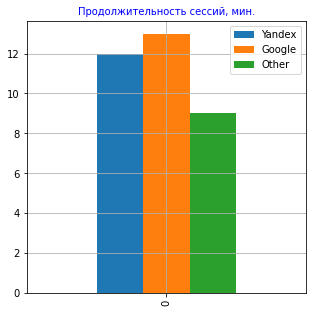

In [84]:
index = np.arange(5)

data = {'Yandex': [12],
        'Google': [13],
        'Other': [9]}
df = pd.DataFrame(data)
df.plot(kind='bar', grid=True, figsize=(5, 5))

plt.title('Продолжительность сессий, мин.', fontsize = 10, color = 'blue')


plt.show()

Итак, 
- почти одинаковые показатели по временному интервалу выдали группы Yandex (12 мин.) и Google (13 мин.)
- самую короткую продолжительность сессий показала группа Other (9 мин.).

### Частота действий.

Рассчитать среднее количество действий, совершенных в приложении, в разбивке по группам. Сравнить и сделать вывод.

#### Yandex - как источник привлечения пользователей.

In [85]:
dataset_sources_yandex.head()

,user_id,first_ts,event.time,event.name,source,event_day,active_date,lifetime
0,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:34:33.849769,search_1,yandex,2019-10-19,2019-10-17,0 days
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:35:19.296599,search_1,yandex,2019-10-19,2019-10-17,0 days
2,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:36:44.344691,search_1,yandex,2019-10-19,2019-10-17,0 days
3,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:40:38.990477,photos_show,yandex,2019-10-19,2019-10-17,0 days
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:42:13.837523,photos_show,yandex,2019-10-19,2019-10-17,0 days


Найдем среднее количество событий в группе пользователей Yandex.

In [86]:
dataset_sources_yandex['event.name'].count().mean()

34266.0

Теперь посмотрим какие действия в большем или меньшем приоритете в данной группе пользователей:

In [87]:
event_yandex = dataset_sources_yandex.groupby('event.name')\
.agg({'user_id':'nunique'}).sort_values(by = 'user_id',ascending = False)
event_yandex

,user_id
event.name,
tips_show,1310
map,687
contacts_show,478
photos_show,443
search_1,345
advert_open,297
search_5,210
search_4,163
favorites_add,160


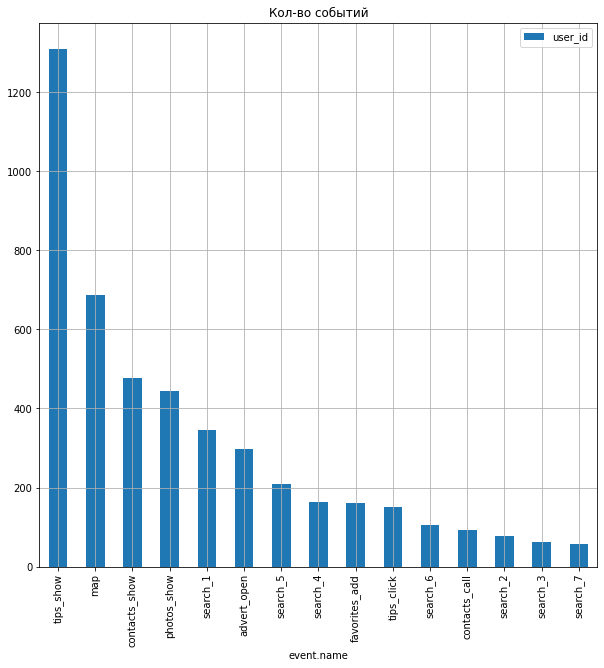

In [88]:
dataset_sources_yandex.groupby('event.name')\
.agg({'user_id':'nunique'}).sort_values(by = 'user_id',ascending = False)\
.plot(y='user_id', kind='bar', grid=True, figsize=(10, 10))
plt.title('Кол-во событий')
plt.show()



По диаграмме видно, что пользователи группы Yandex чаще совершают целевое события - просмотр контактов. Это третье событие после 'пользователь увидел рекомендованные объявления' и 'открыл карту размещенных объявлений'.

#### Google - как источник привлечения пользователей.

In [89]:
dataset_sources_google['event.name'].count().mean()

20392.0

In [90]:
event_google = dataset_sources_google.groupby('event.name')\
.agg({'user_id':'nunique'}).sort_values(by = 'user_id',ascending = False)
event_google

,user_id
event.name,
tips_show,651
photos_show,363
map,354
search_1,305
contacts_show,275
advert_open,195
search_5,137
favorites_add,114
search_4,108


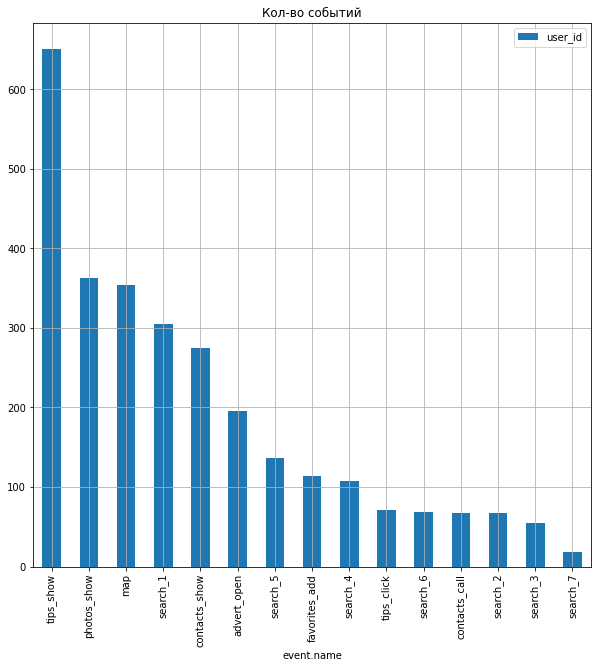

In [91]:
dataset_sources_google.groupby('event.name')\
.agg({'user_id':'nunique'}).sort_values(by = 'user_id',ascending = False)\
.plot(y='user_id', kind='bar', grid=True, figsize=(10, 10))
plt.title('Кол-во событий')
plt.show()



Пользователи группы Google "доходят" совершают целевое событие реже предыдущей группы. Событие 'просмотр контактов' стоит тут на 5 месте, после: 'пользователь увидел рекомендованные объявления', 'photos_show', 'пользователь открыл карту размещенных объявлений', 'какое-то событие, связанное с поиском по сайту'.

#### 'Other' - как источник привлечения пользователей.

In [92]:
dataset_sources_other['event.name'].count().mean()

19460.0

In [93]:
event_other = dataset_sources_other.groupby('event.name')\
.agg({'user_id':'nunique'}).sort_values(by = 'user_id',ascending = False)
event_other

,user_id
event.name,
tips_show,840
map,415
search_5,316
photos_show,289
advert_open,259
contacts_show,226
search_4,203
search_6,157
search_1,137


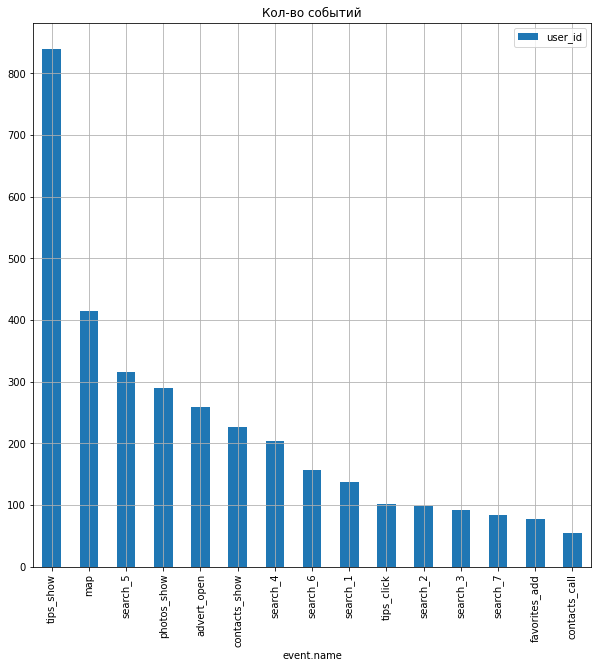

In [94]:
dataset_sources_other.groupby('event.name')\
.agg({'user_id':'nunique'}).sort_values(by = 'user_id',ascending = False)\
.plot(y='user_id', kind='bar', grid=True, figsize=(10, 10))
plt.title('Кол-во событий')
plt.show()

Оставшаяся группа 'Other' реже всех предыдущих "добирается" до 'просмотра контактов' - 6 место. 

Для наглядности построим общую диаграмму для отображения пользователей всех трех групп.

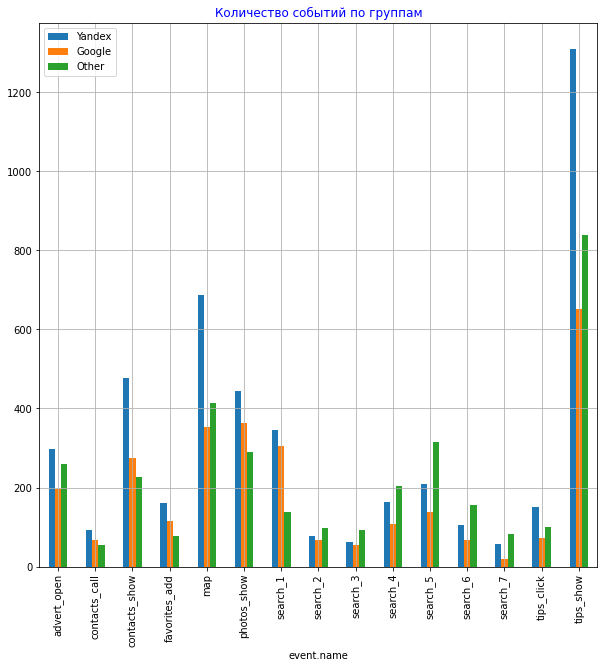

In [95]:
index = np.arange(5)

data = {'Yandex': event_yandex['user_id'],
        'Google': event_google['user_id'],
        'Other': event_other['user_id']}
df = pd.DataFrame(data)
df.plot(kind='bar',grid=True, figsize=(10, 10))

plt.title('Количество событий по группам', fontsize = 12, color = 'blue')

plt.show()

Итак, можно сделать выводы:
- пользователи группы Yandex: самая активная группа пользователей, так как показала наибольшее среднее количество событий (34266) и частоту целевого события (просмотр контактов - 3 место);
- пользователи группы Google: среднее количество событий - 20392, частота целевого события - 5 место;
- пользователи группы 'Other': среднее количество событий - 19460, частота целевого события - 6 место. Показатели этой группы практически совпадают с показателями группы Google.

### Конверсия в целевое действие — просмотр контактов.

Рассчитаем конверсию  в целевое действие  - 'просмотр контактов' (contacts_show), в разрезе групп. То есть найдем отношение количества уникальных пользователей, которые совершили целевое действие (contacts_show) и  общее количества уникальных пользователей. Сравним полученные результаты по группам. Построим диаграммы.

#### Yandex - как источник привлечения пользователей.

In [96]:
dataset_sources_yandex.head()

,user_id,first_ts,event.time,event.name,source,event_day,active_date,lifetime
0,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:34:33.849769,search_1,yandex,2019-10-19,2019-10-17,0 days
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:35:19.296599,search_1,yandex,2019-10-19,2019-10-17,0 days
2,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:36:44.344691,search_1,yandex,2019-10-19,2019-10-17,0 days
3,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:40:38.990477,photos_show,yandex,2019-10-19,2019-10-17,0 days
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-17,2019-10-19 21:42:13.837523,photos_show,yandex,2019-10-19,2019-10-17,0 days


In [97]:
#найдем общее количество уникальных пользователей в группе
dataset_sources_yandex['user_id'] .nunique()

1934

In [98]:
#количества уникальных пользователей, которые совершили событие contacts_show
dataset_sources_yandex.loc[dataset_sources_yandex['event.name'] \
                           == 'contacts_show', 'user_id'].nunique()

478

In [99]:
conv_yandex = round(((dataset_sources_yandex.loc[dataset_sources_yandex['event.name'] \
                           == 'contacts_show', 'user_id'].nunique()) / \
(dataset_sources_yandex['user_id'].nunique())) *100, 2)
conv_yandex

24.72

#### Google - как источник привлечения пользователей.

In [100]:
conv_google = round(((dataset_sources_google.loc[dataset_sources_google['event.name'] \
                           == 'contacts_show', 'user_id'].nunique()) / \
(dataset_sources_google['user_id'].nunique())) *100, 2)
conv_google

24.36

#### 'Other' - как источник привлечения пользователей.

In [101]:
conv_other = round(((dataset_sources_other.loc[dataset_sources_other['event.name'] \
                           == 'contacts_show', 'user_id'].nunique()) / \
(dataset_sources_other['user_id'].nunique())) *100, 2)
conv_other

18.39

Отобразим результаты расчета конверсии на общей диаграмме.

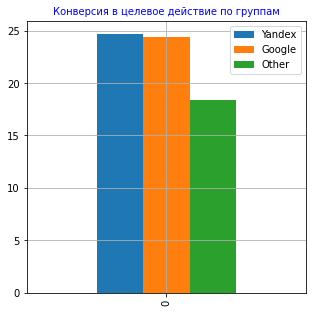

In [102]:
index = np.arange(5)

data = {'Yandex': [conv_yandex],
        'Google': [conv_google],
        'Other': [conv_other]}
df = pd.DataFrame(data)
df.plot(kind='bar', grid=True, figsize=(5, 5))

plt.title('Конверсия в целевое действие по группам', fontsize = 10, color = 'blue')

plt.show()

Итак, лучшие конверсии в целевое событие показали группы пользователей Yandex (24,72%) и Google (24,36%) - почти совпадают, худший результат - группа Other (18,39%).

Вывод по п. 4:



Анализ метрик в разбивке по выбранным группам дал следующие результаты:

*Группа Yandex.*

- Коэффициент удержания на втором месте - пользователи Yandex (27,53%).

- Временной интервал сессии почти совпадает с группой Google -  12 мин.

- Пользователи группы Yandex: самая активная и быстрая группа пользователей, так как показала наибольшее среднее количество событий (34266) и частоту целевого события (просмотр контактов - 3 место)

 - Лучшая конверсия в целевое событие (почти как у группы Google) - 24,72%.

*Группа Google*

- Коэффициент удержания третье место - пользователи Google (25,35%).

- Временной интервал сессии почти совпадает с группой Yandex - 13 мин.

- Среднее количество событий - 20392, частота целевого события - 5 место;

- Конверсию в целевое событие (почти как у группы Yandex) - 24,36%.


*Группа Other*

- Самый высокий коэффициент удержания имеют пользователи группы 'Other' - 27,85%.

- Самую непродолжительную сессию показала группа Other (9 мин.)

- Среднее количество событий - 19460, частота целевого события - 6 место. Показатели этой группы практически совпадают с показателями группы Google.

- Худший результат по конверсии - 18,39%.


Можно сделать вывод, что пользователи группы Yandex - за меньший промежуток времени, в отличии от других групп, приходят к целевому событию. А самые "нерешительные" группа Other.

## Ссылка на дашборд. 

https://public.tableau.com/app/profile/polina8799/viz/_16524747844230/Dashboard1?publish=yes

## Ссылка на презентацию. 

https://disk.yandex.ru/i/KMjlS4cNfcQt2Q

## Проверка гипотез

### Гипотеза 1:

Некоторые пользователи установили приложение по ссылке из yandex , другие — из google . Проверьте гипотезу: две эти группы
демонстрируют разную конверсию в просмотры контактов.

1) Сформулируем нулевую гипотезу (Н0):

"Группы Yandex и Google демонстрируют одинаковую конверсию в целевое событие - просмотры контактов."

2) Альтернативная гипотеза (Н1):

"Две эти группы демонстрируют разную конверсию в просмотры контактов."

Для проверки гипотезы  равенства конверсий воспользуемся специальным методом: proportions_ztest, так как этот тест на пропорции.

In [106]:

import numpy as np
from statsmodels.stats.proportion import proportions_ztest
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу
count = np.array([(dataset_sources_yandex.loc[dataset_sources_yandex['event.name'] \
                           == 'contacts_show', 'user_id'].nunique()),\
                  (dataset_sources_google.loc[dataset_sources_google['event.name'] \
                           == 'contacts_show', 'user_id'].nunique())])
nobs = np.array([(dataset_sources_yandex['user_id'].nunique()), \
                 (dataset_sources_google['user_id'].nunique())])
stat, pval = proportions_ztest(count, nobs)

print('p-значение: ','{0:0.3f}'.format(pval))

if pval < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
                         


p-значение:  0.824
Не получилось отвергнуть нулевую гипотезу


То есть вывод: Группы Yandex и Google демонстрируют одинаковую конверсию в целевое событие - просмотры контактов.

### Гипотеза 2:

Время сессии (интервал  времени от события: пользователь увидел объявление до целевого события: просмотр контактов) у групп пользователей: Yandex и Other -  различается.

1) Сформулируем нулевую гипотезу (Н0):

"Группы Yandex и Other имеют одинаковое время сессии."

2) Альтернативная гипотеза (Н1):

"Две эти группы демонстрируют разное время сессий."

Для проверки гипотезы  равенства временного промежутка сессии воспользуемся специальным методом: st.ttest_ind  

In [104]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(profiles_sources_other['session_duration_sec'], \
                       profiles_sources_yandex['session_duration_sec'],  
    
    equal_var = False, nan_policy = 'omit') 
#агрумент nan_policy = 'omit' дает возможность обойти nan

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    

p-значение:  0.43188943848978967
Не получилось отвергнуть нулевую гипотезу


То есть вывод: будем считать, что группы Yandex и Other имеют одинаковое время сессии.

## Общий вывод.

Исследуя данные мобильного приложения "Ненужные вещи", приходим к выводам:

- как источник привлечения пользователей данного приложения, yandex - лидирует;
- в конце октября 2019 года количество уникальных пользователей резко начало снижаться, но учитывая анализ динамики по дням - заметна цикличность данного показателя, и в начале ноября рост;
- по имеющимся данным, пользователям в среднем от начала до конца сессии необходимо примерно 1,5 часа. Однако, учитывая наличие выбросов, и рассчитав медианную продолжительность сессии - 11 минут, приходим к выводу, что этот показатель лучше отражает реальность.
- рассчитано среднее число сессий в день - 279, динамика данного показателя показывает цикличность и тенденция к росту показателя  - число сессий в день. Хотя в в конце октября  заметен резкий спад и уже в начале ноября показатель уже пошел вверх.

Анализ метрик в разбивке по выбранным группам дал следующие результаты:

*Группа Yandex.*

- Коэффициент удержания на втором месте - пользователи Yandex (27,53%).

- Временной интервал сессии почти совпадает с группой Google -  12 мин.

- Пользователи группы Yandex: самая активная и быстрая группа пользователей, так как показала наибольшее среднее количество событий (34266) и частоту целевого события (просмотр контактов - 3 место)

 - Лучшая конверсия в целевое событие (почти как у группы Google) - 24,72%.

*Группа Google*

- Коэффициент удержания третье место - пользователи Google (25,35%).

- Временной интервал сессии почти совпадает с группой Yandex - 13 мин.

- Среднее количество событий - 20392, частота целевого события - 5 место;

- Конверсию в целевое событие (почти как у группы Yandex) - 24,36%.


*Группа Other*

- Самый высокий коэффициент удержания имеют пользователи группы 'Other' - 27,85%.

- Самую непродолжительную сессию показала группа Other (9 мин.)

- Среднее количество событий - 19460, частота целевого события - 6 место. Показатели этой группы практически совпадают с показателями группы Google.

- Худший результат по конверсии - 18,39%.






## Рекомендации:

- Количество пользовательской активности имеет тенденцию к спаду, поэтому необходимо разработать план мероприятий по привлечению пользователей. 
- Более успешные результаты показали пользователи, привлеченные через Yandex. Эти пользователи - дольше остаются в приложении и за меньший промежуток времени, в отличии от других групп, приходят к целевому событию. А самые "нерешительные" группа Other. Исходя из этого, необходимо обратить большее внимание на Yandex - как на источник привлечения.

